
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Load Iris dataset from CSV

df = pd.read_csv('Iris.csv')

print("Dataset shape:", df.shape)
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nSpecies distribution:")
print(df['Species'].value_counts())


Dataset shape: (150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Column names:
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Species distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [4]:
# Check for missing values and data statistics
print("Missing values:")
print(df.isnull().sum())

print("\n" + "="*50)
print("Statistical Summary:")
print("="*50)
print(df.describe())

# Correlation analysis
print("\n" + "="*50)
print("Feature Correlations:")
print("="*50)
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].corr())


Missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Statistical Summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Feature Correlations:
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729     

In [5]:
# Remove Id column and separate features and targets
df_clean = df.drop('Id', axis=1)

# Extract features
X = df_clean[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Task 1:Liner Regression : Predict PetalWidthCm 
X_regression = df_clean[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']].values
y_regression = df_clean['PetalWidthCm'].values

# Task 2: Logistic Regression : Binary classification (Setosa vs Non-Setosa)
species_encoded = (df_clean['Species'] != 'Iris-setosa').astype(int)
X_classification = X.copy()
y_classification = species_encoded.values

# Task 3: K-Means : Use all features for clustering
M = X.copy()  # Feature matrix for clustering

print("="*60)
print("DATA PREPARATION SUMMARY")
print("="*60)
print(f"\nLinear Regression Task:")
print(f"  X_regression shape: {X_regression.shape} (predict PetalWidthCm)")
print(f"  y_regression shape: {y_regression.shape}")
print(f"  Features: Sepal Length, Sepal Width, Petal Length")

print(f"\nLogistic Regression Task:")
print(f"  X_classification shape: {X_classification.shape}")
print(f"  y_classification shape: {y_classification.shape}")
print(f"  Class 0 (Setosa): {np.sum(y_classification == 0)} samples")
print(f"  Class 1 (Non-Setosa): {np.sum(y_classification == 1)} samples")

print(f"\nK-Means Clustering Task:")
print(f"  Matrix M shape: {M.shape}")
print(f"  Number of elements to cluster: {M.size}")
print(f"  Features: All 4 iris attributes")


DATA PREPARATION SUMMARY

Linear Regression Task:
  X_regression shape: (150, 3) (predict PetalWidthCm)
  y_regression shape: (150,)
  Features: Sepal Length, Sepal Width, Petal Length

Logistic Regression Task:
  X_classification shape: (150, 4)
  y_classification shape: (150,)
  Class 0 (Setosa): 50 samples
  Class 1 (Non-Setosa): 100 samples

K-Means Clustering Task:
  Matrix M shape: (150, 4)
  Number of elements to cluster: 600
  Features: All 4 iris attributes


In [6]:
# Train-Test Split (80-20 split) - Implemented from scratch using numpy
np.random.seed(42)

# Linear Regression split
n_samples_reg = X_regression.shape[0]
indices_reg = np.random.permutation(n_samples_reg)
train_size_reg = int(0.8 * n_samples_reg)
train_idx_reg = indices_reg[:train_size_reg]
test_idx_reg = indices_reg[train_size_reg:]

X_train_reg = X_regression[train_idx_reg]
X_test_reg = X_regression[test_idx_reg]
y_train_reg = y_regression[train_idx_reg]
y_test_reg = y_regression[test_idx_reg]

# Logistic Regression split
n_samples_clf = X_classification.shape[0]
indices_clf = np.random.permutation(n_samples_clf)
train_size_clf = int(0.8 * n_samples_clf)
train_idx_clf = indices_clf[:train_size_clf]
test_idx_clf = indices_clf[train_size_clf:]

X_train_clf = X_classification[train_idx_clf]
X_test_clf = X_classification[test_idx_clf]
y_train_clf = y_classification[train_idx_clf]
y_test_clf = y_classification[test_idx_clf]




In [7]:
# Implement StandardScaler manually ; Formula: X_scaled = (X - mean) / std_dev Mean=0,Std=1
# This helps gradient descent converge faster and prevents feature dominance

class StandardScalerManual:

    def __init__(self):
        self.mean = None
        self.std = None
    
    def fit(self, X):
        """
        Compute mean and standard deviation for each feature.
        X: shape (n_samples, n_features)
        """
        self.mean = np.mean(X, axis=0)  # Mean for each feature
        self.std = np.std(X, axis=0)    # Std dev for each feature
        # Avoid division by zero
        self.std = np.where(self.std == 0, 1, self.std)
        return self
    
    def transform(self, X):
        """
        Standardize features using computed mean and std.
        X: shape (n_samples, n_features)
        Returns: standardized X
        """
        if self.mean is None or self.std is None:
            raise ValueError("Scaler must be fit before transform")
        return (X - self.mean) / self.std
    
    def fit_transform(self, X):
        """
        Fit the scaler and transform X in one step.
        """
        return self.fit(X).transform(X)


In [8]:
# Implement Linear Regression from scratch with L2 Regularization (Ridge Regression)
# Formula: y = X*w + b
# Loss = MSE + L2_penalty
# MSE = (1/2n) * sum((y_pred - y_true)^2)
# L2_penalty = (l2_lambda/(2n)) * sum(w^2)
# Update rule: w = w - lr * (gradient_MSE + gradient_L2)

class LinearRegressionManual:
    """
    Linear Regression with Gradient Descent and L2 Regularization (Ridge)
    """
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):

        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = None
        self.loss_history = []
    
    def fit(self, X, y):

        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Gradient Descent optimization
        for epoch in range(self.epochs):
            # Forward pass: compute predictions
            y_pred = X.dot(self.w) + self.b
            
            # Compute errors
            errors = y_pred - y
            
            # Compute loss (MSE + L2 regularization)
            mse_loss = (1 / (2 * n_samples)) * np.sum(errors ** 2)
            l2_loss = (self.l2_lambda / (2 * n_samples)) * np.sum(self.w ** 2)
            total_loss = mse_loss + l2_loss
            self.loss_history.append(total_loss)
            
            # Compute gradients
            # dL/dw = (1/n) * X^T * (y_pred - y) + (l2_lambda/n) * w
            dw = (1 / n_samples) * X.T.dot(errors) + (self.l2_lambda / n_samples) * self.w
            # dL/db = (1/n) * sum(y_pred - y)
            db = (1 / n_samples) * np.sum(errors)
            
            # Update parameters
            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db
            
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Loss: {total_loss:.6f}")
        
        return self
    
    def predict(self, X):
        """
        Make predictions on new data.
        X: shape (n_samples, n_features)
        Returns: predictions (n_samples,)
        """
        if self.w is None:
            raise ValueError("Model must be fit before predict")
        return X.dot(self.w) + self.b


# Train Linear Regression Model
print("\n" + "="*60)
print("TRAINING LINEAR REGRESSION (WITHOUT REGULARIZATION)")
print("="*60)

# Standardize the data
scaler_reg = StandardScalerManual()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Train without regularization
lr_model = LinearRegressionManual(lr=0.01, epochs=500, l2_lambda=0.0)
lr_model.fit(X_train_reg_scaled, y_train_reg)

# Make predictions
y_train_pred = lr_model.predict(X_train_reg_scaled)
y_test_pred = lr_model.predict(X_test_reg_scaled)

# Compute metrics
train_mse = np.mean((y_train_pred - y_train_reg) ** 2)
test_mse = np.mean((y_test_pred - y_test_reg) ** 2)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"\nModel Performance (No Regularization):")
print(f"Training RMSE: {train_rmse:.6f}")
print(f"Test RMSE: {test_rmse:.6f}")
print(f"Model Weights: {lr_model.w}")
print(f"Model Bias: {lr_model.b:.6f}")

# Train with regularization (Ridge Regression)
print("\n" + "="*60)
print("TRAINING LINEAR REGRESSION (WITH L2 REGULARIZATION)")
print("="*60)

lr_model_ridge = LinearRegressionManual(lr=0.01, epochs=500, l2_lambda=0.1)
lr_model_ridge.fit(X_train_reg_scaled, y_train_reg)

y_train_pred_ridge = lr_model_ridge.predict(X_train_reg_scaled)
y_test_pred_ridge = lr_model_ridge.predict(X_test_reg_scaled)

train_mse_ridge = np.mean((y_train_pred_ridge - y_train_reg) ** 2)
test_mse_ridge = np.mean((y_test_pred_ridge - y_test_reg) ** 2)
train_rmse_ridge = np.sqrt(train_mse_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)

print(f"\nModel Performance (With L2 Regularization λ=0.1):")
print(f"Training RMSE: {train_rmse_ridge:.6f}")
print(f"Test RMSE: {test_rmse_ridge:.6f}")
print(f"Model Weights: {lr_model_ridge.w}")
print(f"Model Bias: {lr_model_ridge.b:.6f}")



TRAINING LINEAR REGRESSION (WITHOUT REGULARIZATION)
Epoch 100/500, Loss: 0.134004
Epoch 200/500, Loss: 0.045840
Epoch 300/500, Loss: 0.032970
Epoch 400/500, Loss: 0.029898
Epoch 500/500, Loss: 0.028292

Model Performance (No Regularization):
Training RMSE: 0.237816
Test RMSE: 0.283426
Model Weights: [ 0.22017781 -0.04580868  0.5069102 ]
Model Bias: 1.163968

TRAINING LINEAR REGRESSION (WITH L2 REGULARIZATION)
Epoch 100/500, Loss: 0.134104
Epoch 200/500, Loss: 0.045955
Epoch 300/500, Loss: 0.033094
Epoch 400/500, Loss: 0.030030
Epoch 500/500, Loss: 0.028435

Model Performance (With L2 Regularization λ=0.1):
Training RMSE: 0.237881
Test RMSE: 0.283459
Model Weights: [ 0.22028319 -0.04591335  0.50645876]
Model Bias: 1.163968


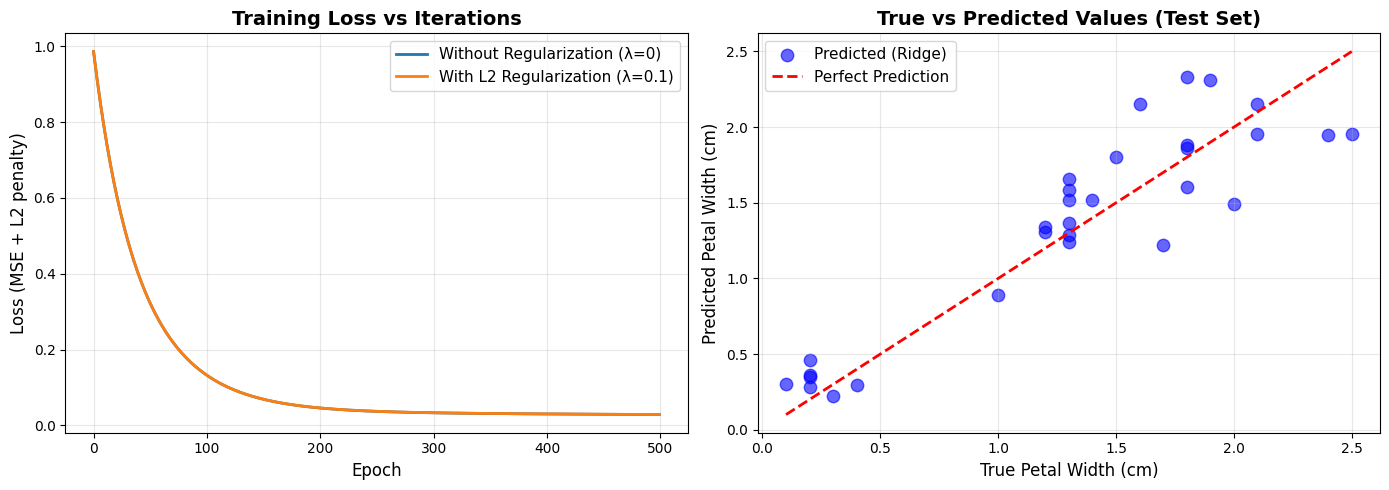


✓ Linear Regression visualization saved!


In [9]:
# Visualization: Loss vs Iterations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss curves comparison
axes[0].plot(lr_model.loss_history, label='Without Regularization (λ=0)', linewidth=2)
axes[0].plot(lr_model_ridge.loss_history, label='With L2 Regularization (λ=0.1)', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE + L2 penalty)', fontsize=12)
axes[0].set_title('Training Loss vs Iterations', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: True vs Predicted values (Test Set)
axes[1].scatter(y_test_reg, y_test_pred_ridge, alpha=0.6, s=80, label='Predicted (Ridge)', color='blue')
axes[1].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('True Petal Width (cm)', fontsize=12)
axes[1].set_ylabel('Predicted Petal Width (cm)', fontsize=12)
axes[1].set_title('True vs Predicted Values (Test Set)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('linear_regression_results.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Linear Regression visualization saved!")



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [12]:
# Implement sigmoid function
# Sigmoid: σ(z) = 1 / (1 + e^(-z))
# Output range: (0, 1) - probability score
# Used in logistic regression to convert linear output to probability

def sigmoid(z):
    """
    Sigmoid activation function.
    Converts any input to a probability between 0 and 1.
    Formula: σ(z) = 1 / (1 + e^(-z))
    """
    # Clip z to prevent overflow in exp
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


# Test sigmoid function
print("="*60)
print("TESTING SIGMOID FUNCTION")
print("="*60)
z_test = np.array([-2, -1, 0, 1, 2])
sig_test = sigmoid(z_test)
print(f"z values: {z_test}")
print(f"sigmoid(z): {sig_test}")


TESTING SIGMOID FUNCTION
z values: [-2 -1  0  1  2]
sigmoid(z): [0.11920292 0.26894142 0.5        0.73105858 0.88079708]


In [13]:
# Implement Logistic Regression from scratch with L2 Regularization
# Formula: y_pred = sigmoid(X*w + b)
# Loss = Binary Cross Entropy + L2_penalty
# BCE = -(1/n) * sum(y*log(y_pred) + (1-y)*log(1-y_pred))
# L2_penalty = (l2_lambda/(2n)) * sum(w^2)
# Gradient update includes regularization term

class LogisticRegressionManual:
    """
    Logistic Regression with Gradient Descent and L2 Regularization.
    Uses Sigmoid function and Binary Cross Entropy loss.
    """
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = None
        self.loss_history = []
    
    def fit(self, X, y):
        """
        y: shape (n_samples,) - binary labels (0 or 1)
        X: shape (n_samples, n_features)
        """
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Gradient Descent optimization
        for epoch in range(self.epochs):
            # Forward pass: compute predictions
            z = X.dot(self.w) + self.b
            y_pred = sigmoid(z)
            
            # Clip predictions to avoid log(0)
            y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
            
            # Compute Binary Cross Entropy loss
            bce_loss = -(1 / n_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            
            # Add L2 regularization term
            l2_loss = (self.l2_lambda / (2 * n_samples)) * np.sum(self.w ** 2)
            total_loss = bce_loss + l2_loss
            self.loss_history.append(total_loss)
            
            # Compute gradients
            errors = y_pred - y
            # dL/dw = (1/n) * X^T * (y_pred - y) + (l2_lambda/n) * w
            dw = (1 / n_samples) * X.T.dot(errors) + (self.l2_lambda / n_samples) * self.w
            # dL/db = (1/n) * sum(y_pred - y)
            db = (1 / n_samples) * np.sum(errors)
            
            # Update parameters
            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db
            
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Loss: {total_loss:.6f}")
        
        return self
    
    def predict_proba(self, X):
        """
        Predict probability of class 1.
        X: shape (n_samples, n_features)
        Returns: probabilities (n_samples,)
        """
        if self.w is None:
            raise ValueError("Model must be fit before predict_proba")
        z = X.dot(self.w) + self.b
        return sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


# Train Logistic Regression Model
print("\n" + "="*60)
print("TRAINING LOGISTIC REGRESSION (WITHOUT REGULARIZATION)")
print("="*60)

# Standardize the classification data
scaler_clf = StandardScalerManual()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Train without regularization
lg_model = LogisticRegressionManual(lr=0.01, epochs=500, l2_lambda=0.0)
lg_model.fit(X_train_clf_scaled, y_train_clf)

# Make predictions
y_train_pred_proba = lg_model.predict_proba(X_train_clf_scaled)
y_train_pred_clf = lg_model.predict(X_train_clf_scaled)
y_test_pred_proba = lg_model.predict_proba(X_test_clf_scaled)
y_test_pred_clf = lg_model.predict(X_test_clf_scaled)

# Compute accuracy
train_accuracy = np.mean(y_train_pred_clf == y_train_clf)
test_accuracy = np.mean(y_test_pred_clf == y_test_clf)

print(f"\nModel Performance (No Regularization):")
print(f"Training Accuracy: {train_accuracy:.6f}")
print(f"Test Accuracy: {test_accuracy:.6f}")
print(f"Model Weights: {lg_model.w}")
print(f"Model Bias: {lg_model.b:.6f}")

# Train with regularization
print("\n" + "="*60)
print("TRAINING LOGISTIC REGRESSION (WITH L2 REGULARIZATION)")
print("="*60)

lg_model_ridge = LogisticRegressionManual(lr=0.01, epochs=500, l2_lambda=0.1)
lg_model_ridge.fit(X_train_clf_scaled, y_train_clf)

y_train_pred_clf_ridge = lg_model_ridge.predict(X_train_clf_scaled)
y_test_pred_clf_ridge = lg_model_ridge.predict(X_test_clf_scaled)

train_accuracy_ridge = np.mean(y_train_pred_clf_ridge == y_train_clf)
test_accuracy_ridge = np.mean(y_test_pred_clf_ridge == y_test_clf)

print(f"\nModel Performance (With L2 Regularization λ=0.1):")
print(f"Training Accuracy: {train_accuracy_ridge:.6f}")
print(f"Test Accuracy: {test_accuracy_ridge:.6f}")
print(f"Model Weights: {lg_model_ridge.w}")
print(f"Model Bias: {lg_model_ridge.b:.6f}")



TRAINING LOGISTIC REGRESSION (WITHOUT REGULARIZATION)
Epoch 100/500, Loss: 0.370826
Epoch 200/500, Loss: 0.254487
Epoch 300/500, Loss: 0.196167
Epoch 400/500, Loss: 0.160789
Epoch 500/500, Loss: 0.136840

Model Performance (No Regularization):
Training Accuracy: 1.000000
Test Accuracy: 1.000000
Model Weights: [ 0.50902172 -0.65469333  0.80511242  0.7613524 ]
Model Bias: 0.501358

TRAINING LOGISTIC REGRESSION (WITH L2 REGULARIZATION)
Epoch 100/500, Loss: 0.371027
Epoch 200/500, Loss: 0.254954
Epoch 300/500, Loss: 0.196871
Epoch 400/500, Loss: 0.161703
Epoch 500/500, Loss: 0.137942

Model Performance (With L2 Regularization λ=0.1):
Training Accuracy: 1.000000
Test Accuracy: 1.000000
Model Weights: [ 0.50814967 -0.65344888  0.80367687  0.76000081]
Model Bias: 0.501383


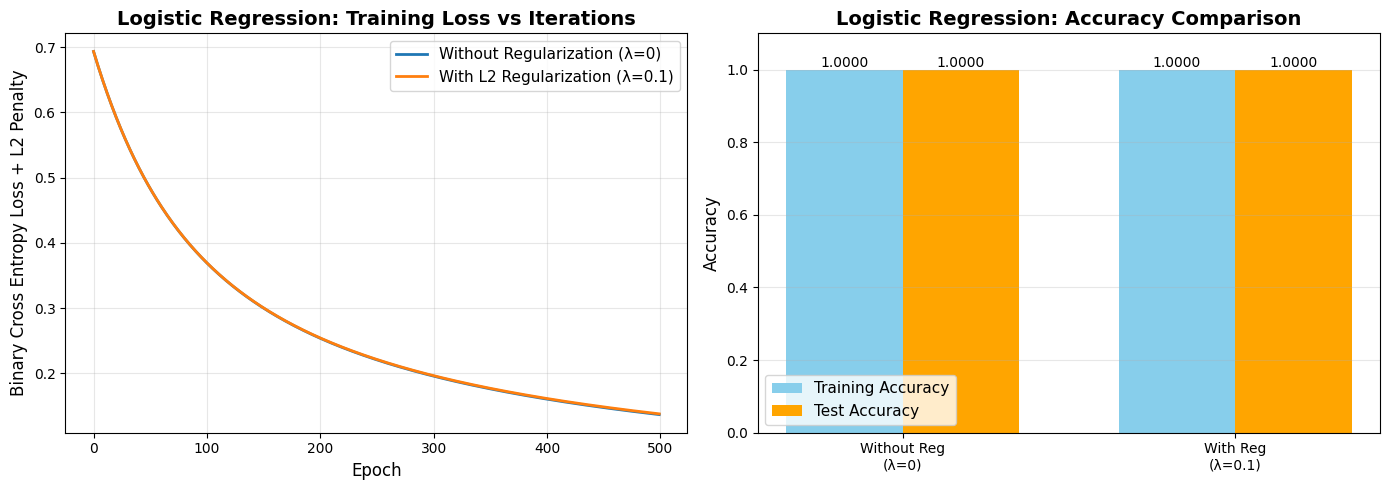


✓ Logistic Regression visualization saved!


In [14]:
# Visualization: Loss curves and Accuracy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss curves comparison
axes[0].plot(lg_model.loss_history, label='Without Regularization (λ=0)', linewidth=2)
axes[0].plot(lg_model_ridge.loss_history, label='With L2 Regularization (λ=0.1)', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Binary Cross Entropy Loss + L2 Penalty', fontsize=12)
axes[0].set_title('Logistic Regression: Training Loss vs Iterations', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Accuracy Comparison
models = ['Without Reg\n(λ=0)', 'With Reg\n(λ=0.1)']
train_accs = [train_accuracy, train_accuracy_ridge]
test_accs = [test_accuracy, test_accuracy_ridge]

x = np.arange(len(models))
width = 0.35

bars1 = axes[1].bar(x - width/2, train_accs, width, label='Training Accuracy', color='skyblue')
bars2 = axes[1].bar(x + width/2, test_accs, width, label='Test Accuracy', color='orange')

axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Logistic Regression: Accuracy Comparison', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend(fontsize=11)
axes[1].set_ylim([0, 1.1])
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.4f}',
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('logistic_regression_results.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Logistic Regression visualization saved!")



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [15]:
# Implement K-Means Clustering for matrix elements
# K-Means clusters individual elements (scalars) not rows
# Steps:
# 1. Randomly initialize k centroids
# 2. Assign each element to nearest centroid
# 3. Update centroids as mean of assigned elements
# 4. Repeat until convergence

def kmeans_matrix(M, k, max_iters=100):
    n, m = M.shape
    
    # Flatten matrix to get all scalar values
    elements = M.flatten()
    n_elements = len(elements)
    
    # Step 1: Initialize centroids randomly from data points
    np.random.seed(42)
    centroid_indices = np.random.choice(n_elements, k, replace=False)
    centroids = elements[centroid_indices].copy()
    
    print(f"\nK-Means Clustering Configuration:")
    print(f"Matrix shape: {M.shape}")
    print(f"Number of elements: {n_elements}")
    print(f"Number of clusters (k): {k}")
    print(f"Initial centroids: {centroids}")
    
    # K-Means iterations
    for iteration in range(max_iters):
        # Step 2: Assign each element to nearest centroid
        distances = np.abs(elements[:, np.newaxis] - centroids[np.newaxis, :])
        assignments = np.argmin(distances, axis=1)
        
        # Step 3: Update centroids
        new_centroids = np.zeros(k)
        for cluster_id in range(k):
            cluster_elements = elements[assignments == cluster_id]
            if len(cluster_elements) > 0:
                new_centroids[cluster_id] = np.mean(cluster_elements)
            else:
                # Keep old centroid if no elements assigned
                new_centroids[cluster_id] = centroids[cluster_id]
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            print(f"Converged at iteration {iteration + 1}")
            break
        
        centroids = new_centroids
        
        if (iteration + 1) % 10 == 0:
            print(f"Iteration {iteration + 1}/{max_iters}, Centroids: {centroids}")
    
    # Final assignment
    distances = np.abs(elements[:, np.newaxis] - centroids[np.newaxis, :])
    assignments = np.argmin(distances, axis=1)
    
    # Step 4: Create assignment_table (reshape to original shape)
    assignment_table = assignments.reshape(n, m)
    
    # Step 5: Create cookbook (dict: cluster_id -> list of (i, j) positions)
    cookbook = {}
    for cluster_id in range(k):
        positions = np.argwhere(assignment_table == cluster_id).tolist()
        cookbook[cluster_id] = positions
    
    return assignment_table, cookbook, centroids


# Run K-Means clustering
print("="*60)
print("K-MEANS CLUSTERING ON IRIS FEATURE MATRIX")
print("="*60)

k = 5
assignment_table, cookbook, centroids = kmeans_matrix(M, k, max_iters=100)

print(f"\nFinal Centroids: {centroids}")
print(f"\nCluster Distribution:")
for cluster_id, positions in cookbook.items():
    print(f"Cluster {cluster_id}: {len(positions)} elements")
    print(f"  Positions (first 5): {positions[:5]}")

print(f"\nAssignment Table shape: {assignment_table.shape}")
print(f"Assignment Table (first 5 rows):\n{assignment_table[:5, :]}")


K-MEANS CLUSTERING ON IRIS FEATURE MATRIX

K-Means Clustering Configuration:
Matrix shape: (150, 4)
Number of elements: 600
Number of clusters (k): 5
Initial centroids: [1.5 2.2 3.1 3.8 3. ]
Converged at iteration 9

Final Centroids: [0.244      1.60460526 4.74344262 6.23174603 3.05466667]

Cluster Distribution:
Cluster 0: 50 elements
  Positions (first 5): [[0, 3], [1, 3], [2, 3], [3, 3], [4, 3]]
Cluster 1: 152 elements
  Positions (first 5): [[0, 2], [1, 2], [2, 2], [3, 2], [4, 2]]
Cluster 2: 122 elements
  Positions (first 5): [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0]]
Cluster 3: 126 elements
  Positions (first 5): [[14, 0], [15, 0], [18, 0], [33, 0], [36, 0]]
Cluster 4: 150 elements
  Positions (first 5): [[0, 1], [1, 1], [2, 1], [3, 1], [4, 1]]

Assignment Table shape: (150, 4)
Assignment Table (first 5 rows):
[[2 4 1 0]
 [2 4 1 0]
 [2 4 1 0]
 [2 4 1 0]
 [2 4 1 0]]


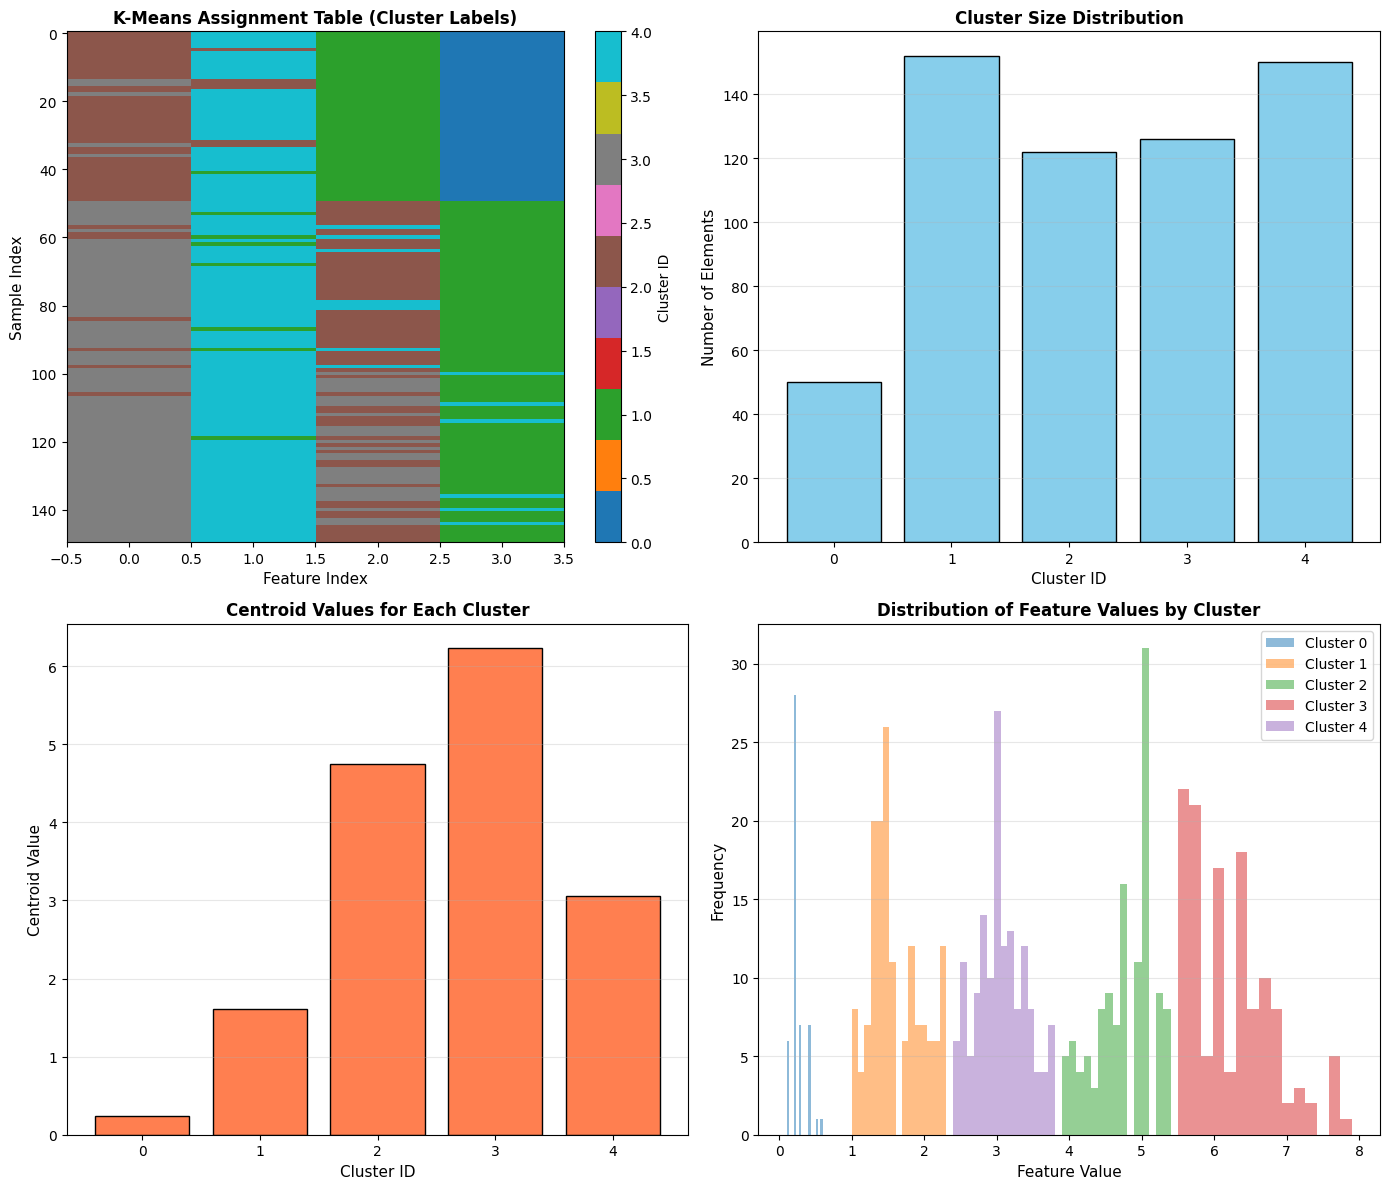


✓ K-Means clustering visualization saved!


In [16]:
# Visualization: K-Means clustering results
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Heatmap of assignment table
im1 = axes[0, 0].imshow(assignment_table, cmap='tab10', aspect='auto')
axes[0, 0].set_xlabel('Feature Index', fontsize=11)
axes[0, 0].set_ylabel('Sample Index', fontsize=11)
axes[0, 0].set_title('K-Means Assignment Table (Cluster Labels)', fontsize=12, fontweight='bold')
plt.colorbar(im1, ax=axes[0, 0], label='Cluster ID')

# Plot 2: Cluster size distribution
cluster_sizes = [len(positions) for positions in cookbook.values()]
cluster_ids = list(cookbook.keys())
axes[0, 1].bar(cluster_ids, cluster_sizes, color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Cluster ID', fontsize=11)
axes[0, 1].set_ylabel('Number of Elements', fontsize=11)
axes[0, 1].set_title('Cluster Size Distribution', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Centroid values
axes[1, 0].bar(range(k), centroids, color='coral', edgecolor='black')
axes[1, 0].set_xlabel('Cluster ID', fontsize=11)
axes[1, 0].set_ylabel('Centroid Value', fontsize=11)
axes[1, 0].set_title('Centroid Values for Each Cluster', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Distribution of elements in clusters
cluster_ranges = []
for cluster_id in range(k):
    cluster_elements = M.flatten()[assignment_table.flatten() == cluster_id]
    if len(cluster_elements) > 0:
        axes[1, 1].hist(cluster_elements, alpha=0.5, label=f'Cluster {cluster_id}', bins=15)

axes[1, 1].set_xlabel('Feature Value', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Distribution of Feature Values by Cluster', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('kmeans_clustering_results.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ K-Means clustering visualization saved!")



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
